# **Wood study clustering**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from numpy import arange

import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
clustering = pd.read_csv('Data\clustering.csv')
cluster = KMeans(n_clusters = 4)
cols = clustering.columns[:]
clustering.drop(clustering.columns[[0]], axis = 1, inplace = True)
clustering.head()

,Subjects,Difference,Total-B/D,Study,AgeProfile
0,Subj_317,-320,56.0,Wood,Young
1,Subj_318,-1030,63.0,Wood,Young
2,Subj_319,-1850,59.0,Wood,Young
3,Subj_320,-775,54.0,Wood,Young
4,Subj_321,-1600,65.0,Wood,Young


In [3]:
y_predicted = cluster.fit_predict(clustering[["Difference","Total-B/D"]])
clustering["cluster"] = y_predicted
clustering.head()

,Subjects,Difference,Total-B/D,Study,AgeProfile,cluster
0,Subj_317,-320,56.0,Wood,Young,2
1,Subj_318,-1030,63.0,Wood,Young,2
2,Subj_319,-1850,59.0,Wood,Young,1
3,Subj_320,-775,54.0,Wood,Young,2
4,Subj_321,-1600,65.0,Wood,Young,1


No handles with labels found to put in legend.


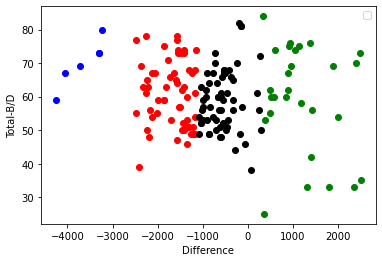

In [4]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Difference, df1["Total-B/D"], color='green')
plt.scatter(df2.Difference, df2["Total-B/D"], color='red')
plt.scatter(df3.Difference, df3["Total-B/D"], color='black')
plt.scatter(df4.Difference, df4["Total-B/D"], color='blue')

plt.xlabel("Difference")
plt.ylabel("Total-B/D")
plt.legend()

In [5]:
clustering[['Difference','Total-B/D']] = minmax_scale(clustering[['Difference','Total-B/D']])
clustering.head()

,Subjects,Difference,Total-B/D,Study,AgeProfile,cluster
0,Subj_317,0.582222,0.525424,Wood,Young,2
1,Subj_318,0.477037,0.644068,Wood,Young,2
2,Subj_319,0.355556,0.576271,Wood,Young,1
3,Subj_320,0.514815,0.491525,Wood,Young,2
4,Subj_321,0.392593,0.677966,Wood,Young,1


In [6]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(clustering[["Difference", "Total-B/D"]])

In [7]:
clustering["cluster"] = y_predicted
clustering.head()

,Subjects,Difference,Total-B/D,Study,AgeProfile,cluster
0,Subj_317,0.582222,0.525424,Wood,Young,2
1,Subj_318,0.477037,0.644068,Wood,Young,2
2,Subj_319,0.355556,0.576271,Wood,Young,2
3,Subj_320,0.514815,0.491525,Wood,Young,2
4,Subj_321,0.392593,0.677966,Wood,Young,3


In [8]:
km.cluster_centers_

array([[0.84861111, 0.1970339 ],
       [0.68542543, 0.74713697],
       [0.48381847, 0.48627357],
       [0.32816817, 0.74530463]])

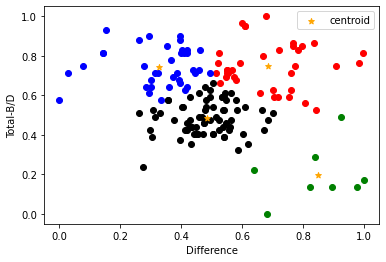

In [9]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Difference, df1["Total-B/D"], color='green')
plt.scatter(df2.Difference, df2["Total-B/D"], color='red')
plt.scatter(df3.Difference, df3["Total-B/D"], color='black')
plt.scatter(df4.Difference, df4["Total-B/D"], color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="orange", marker="*", label="centroid")

plt.xlabel("Difference")
plt.ylabel("Total-B/D")
plt.legend()

In [10]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(clustering[["Difference", "Total-B/D"]])
    sse.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
sse

[10.51271497908734,
 7.002477933644922,
 4.788279566527742,
 3.3892316916603384,
 2.741761421875255,
 2.1955361147494585,
 1.8606315492565484,
 1.5517777863144369,
 1.39982352525174]

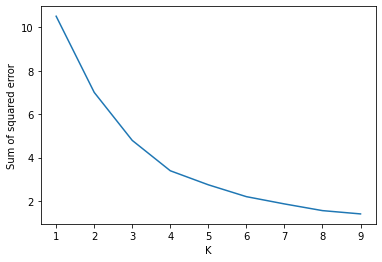

In [12]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)
#This is indictaing that the optimum number of clusters is 4 but 3 is also a reasonable choice

<AxesSubplot:xlabel='Difference', ylabel='Total-B/D'>

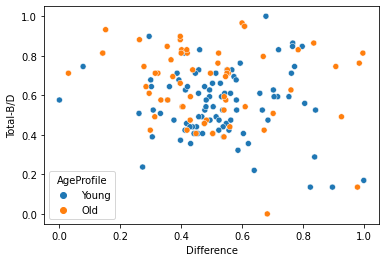

In [13]:
sns.scatterplot(data=clustering, x="Difference", y="Total-B/D", hue="AgeProfile")